# Object Oriented Programming 2 - examples and APIs


## Tasks Today:

   

1) <b>Shopping Cart Example</b> <br>
2) <b>Requests and the pokemon API </b> <br>
 

# Goal 
### build a shopping cart program with prices and quantities using objects and a dictionary

In [ ]:
from IPython.display import clear_output as clear
# Create a class called cart that retains items and has methods to add, remove, and show

#This class is only responsible for the cart object and the actions of the cart object
class Cart():
    def __init__(self):
        self.items = {}
        
    def add_item(self):
        clear()
        new_item = input("What would you like to add? ")
        print(new_item)
        quantity = int(input(f"How many of that {new_item} do you want? (insert a number)" ))
        if new_item not in self.items:
            self.items[new_item] = quantity
        
        else:
             self.items[new_item] += quantity
        print(f"{quantity} {new_item}(s) have been added to your cart!")
              
    def remove_item(self):
        clear()
        discard = input("What would you like to remove? ")
        print(discard)
        quantity = int(input("How many would you like to remove? "))
        print(quantity)
        try:
            self.items[discard] -= quantity
            if self.items[discard] <= 0:
                del self.items[discard]
            print(f"{quantity} {discard}(s) have been removed")
        except:
              print(f"{discard} is not in your cart.")
        self.show()
              
    def show(self):
        clear()
        print("The following items are in your cart: ")
        for item,quantity in self.items.items():
            print(f"{item} | quantity: {quantity}")
              
    def checkout(self):
        if not self.items:
            print("Please buy something next time and get out of my store!")
        else:
            print("Unexpected item in bagging area, please remove item or ask for assistance!")
            print("Thanks for shopping....")
            self.show()


#control the logic and flow/operation of our program           
class Main:
    def showInstructions():
        print("""
        Welcome to the Shopping Cart Program, can I take your order?
        Here are your options:
        [1] Show Currrent Cart
        [2] Add Item
        [3] Remove Item
        [4] Show Instructions
        [5] Quit
        """)
    #driver code - respsonsible for calling all methods from Cart class
    def run(self):
        Main.showInstructions()
        my_cart = Cart()
        
        while True:
            choice = input("What would you like to do? ")
            if choice == "1":
                if my_cart.items == {}:
                    print("Your cart is empty... lets get shoppin'!")
                else:
                    my_cart.show()
            elif choice == "2":
                my_cart.add_item()
            elif choice == "3":
                if my_cart.items == {}:
                    print("Your cart is empty... please add something before removing.")
                else:
                    my_cart.remove_item()
            elif choice == "4":
                Main.showInstructions()
            elif choice == "5":
                my_cart.checkout()
                break
            else:
                print("Please enter a valid response and try again...")
                
# Main.run()
myCartProgram = Main()
myCartProgram.run()
        

# working with APis

<p> What exactly is an API? <br> <br>
API is the acronym for Application Programming Interface, which is a software intermediary that allows two applications to talk to each other. Each time you use an app like Facebook, send an instant message, or check the weather on your phone, you're using an API. </p>

### The Poke API  allows you to retreive a pokemon's information from PokeAPI https://pokeapi.co/



In [ ]:
# making an API call
import requests
r = requests.get("https://pokeapi.co/api/v2/pokemon/alakazam")
if r.status_code == 200:
    data = r.json()
print(data.keys())

### Display a Pokemon's name, weight, abilities, and types

In [ ]:
# get the name
name = data['name']
print(name)


In [ ]:
# get types
type_ = data['types'][0]['type']['name']
print(type_)

types = [pokemon['type']['name'] for pokemon in data['types']]
print(types)

In [ ]:
# get weight
weight = data['weight']
print(weight)

In [ ]:
# get abilities
abilities = [ability['ability']['name'] for ability in data['abilities']]
print(abilities)

In [ ]:
# Create a structure for a single pokemon

my_pokemon = {
    'name':'',
    'abilities' : [],
    'weight' : 0
    'types' : []
}

In [ ]:
alakazam = {
    'name' : name,
    'abilities': abilities,
    'weight' : weight,
    'types' : types
}

alakazam

#### Create a function to Pull in your own Pokemon's data 

In [ ]:
import requests
def poke_api_call(pokemon):
    req = requests.get(f"https://pokeapi.co/api/v2/pokemon/{pokemon}")
    if req.status_code == 200:
        data = req.json()
        name = data['name']
        types = [type_['type']['name']for type_ in data['types']]
        abilities = [ability['ability']['name']for ability in data['abilities']]
        weight = data['weight']
        
        
        poke = {
            "name": name,
            "abilities": abilities,
            "weight": weight,
            "types": types
        }
        return poke

Choose your pokemon

In [ ]:
from random import randint
# Random number generated for each pokemon id
random_team = [randint(1,898) for i in range(6)]
print(random_team)

your_team = ['electivire', 'tyranitar','lucario','volcarona','alakazam','aegislash-blade']


#### Use your function to create a dictionary of your Johto League 6  (favorite 6 pokemon)

In [ ]:
# Place all 6 of your pokemon on the object below, each pokemon should have at least as much info as Pikachu did.
my_six_pokemon = {}
for mon in your_team:
    poke_stats = poke_api_call(mon)
    my_six_pokemon[poke_stats['name'].title()] = poke_stats
    
my_six_pokemon

## Lets create a class called 'Pokemon' and create our pokemon as instances

In [ ]:
class Pokemon():
    def __init__(self,name):
        self.name = name
        self.types = []
        self.abilities = []
        self.weight = 0
        self.poke_api_call() #<---Calls poke_api_call when object is created
        
    def poke_api_call(self):
        req = requests.get(f"https://pokeapi.co/api/v2/pokemon/{self.name}")
        if req.status_code == 200:
            data = req.json()
            self.name = data['name']
            self.types = [type_['type']['name']for type_ in data['types']]
            self.abilities = [ability['ability']['name']for ability in data['abilities']]
            self.weight = data['weight']
            print(f"{self.name} data has been updated!")
        else:
            print(f"Ran into an issue {req.status_code}")
            return
                
    def __repr__(self):
        return f"You caught a {self.name.title()}!"

### Let's Catch some Pokemon

In [ ]:
volcarona = Pokemon("volcarona")
print(volcarona.__dict__)

In [ ]:
my_pokemon = ['electivire', 'tyranitar','lucario','volcarona','alakazam','aegislash-blade']
pokedex = {}
for mon in my_pokemon:
    pokeball = Pokemon(mon)
    pokedex[mon.title()]=pokeball.__dict__
#     print(pokeball.abilities)
print(pokedex.display())

In [ ]:
print(volcarona.abilities)

## Exercise 1:

### Create a Method prints an image of your pokemon

<p>HINT: You may need another attribute as well to store your image url within. </p>

In [ ]:
# Display an image in Jupyter notebook
from IPython.display import Image

# display(Image( 'https://i.redd.it/45n4mhusa8l41.jpg', width = 300))
display(Image('https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/shiny/10026.png', width = 300))

In [ ]:
# recreate your pokemon class here
import requests
class Pokemon():
    def __init__(self,name):
        self.name = name
        self.types = []
        self.abilities = []
        self.weight = 0
        self.image = None
        self.poke_api_call() #<---Calls poke_api_call when object is created
        self.display()
        
    def poke_api_call(self):
        req = requests.get(f"https://pokeapi.co/api/v2/pokemon/{self.name}")
        if req.status_code == 200:
            data = req.json()
            self.name = data['name']
            self.types = [type_['type']['name']for type_ in data['types']]
            self.abilities = [ability['ability']['name']for ability in data['abilities']]
            self.weight = data['weight']
            self.image = data['sprites']['front_shiny']
            print(f"{self.name} data has been updated!")
        else:
            print(f"Ran into an issue {req.status_code}")
            return
      #display image method   
    def display(self):
        display(Image(url = self.image))
    def __repr__(self):
        return f"You caught a {self.name.title()}!"
    

In [ ]:
volcarona = Pokemon('volcarona')
volcarona

In [ ]:
# Calling our new method
volcarona.display()

## Exercise 2:

### Create a Method that evolves your Pokemon
If your pokemon can't evolve any further print a message that says "\<name of pokemon> can't evolve."

In [3]:
from time import sleep
class Evolver:
    def evolve(self):
        #API call for pokemon's species
        r = requests.get(f"https://pokeapi.co/api/v2/pokemon-species/{self.name}")
        if r.status_code != 200:
            print(f"Species Status {r.status_code}")
            return
        else:
            pokemon_species = r.json()
        #API call for evolutionary chain
        r2 = requests.get(pokemon_species['evolution_chain']['url'])
        if r2.status_code != 200:
            print(f"Evolution chain error {r2.status_code}")
            return
        else:
            ev_chain = r2.json()
            ev_chain = ev_chain['chain']
        
        base_name = ev_chain["species"]["name"]
        evolution = ev_chain['evolves_to'][0]
        evolution_name = evolution['species']['name']
        #Check for Base Pokemon
        if base_name == self.name:
            pass
        #2nd evolution
        elif evolution_name == self.name:
            evolution_name = evolution['evolves_to'][0]['species']['name']
        #3rd evolution
        else:
            print(f"You can't evolve your {self.name} anymore. ")
            return
            
        print("......")
        sleep(1)
        print(f"Your {self.name} is evolving....")
        self.display()
        sleep(1)
        print(".....")
        self.name = evolution_name
        self.poke_api_call()
        self.display()

In [4]:
import requests
class Pokemon(Evolver,Moves_tutor):
    def __init__(self, name):
        super().__init__
        Moves_tutor.__init__(self)
        self.name = name
        self.types = []
        self.abilities = []
        self.weight = 0
        self.image = None
        self.poke_api_call() #<---Calls poke_api_call when object is created
        self.display()
        
    def poke_api_call(self):
        req = requests.get(f"https://pokeapi.co/api/v2/pokemon/{self.name}")
        if req.status_code == 200:
            data = req.json()
            self.name = data['name']
            self.types = [type_['type']['name']for type_ in data['types']]
            self.abilities = [ability['ability']['name']for ability in data['abilities']]
            self.weight = data['weight']
            self.image = data['sprites']['front_shiny']
            print(f"{self.name} data has been updated!")
        else:
            print(f"Ran into an issue {req.status_code}")
            return
      #display image method   
    def display(self):
        display(Image(url = self.image))
    def __repr__(self):
        return f"You caught a {self.name.title()}!"
    


Now let's evolve a few

In [ ]:
dratini = Pokemon("dratini")

In [ ]:
dratini.evolve()

#  Final Exercise: <br> <br>Create a Move_Tutor Class that will allow the Pokemon Class to inherit a move list.
<br>
<p>for an added bonus you can make sure that if a pokemon has 4 moves the user can choose one of them to replace with a new move. </p>

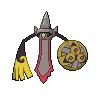

In [2]:
from IPython.display import Image

# display(Image( 'https://i.redd.it/45n4mhusa8l41.jpg', width = 300))
display(Image('https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/shiny/10026.png', width = 300))

In [1]:
import requests
#     def __init__(self):
#         self.move_list = []
#         len(self.move_list) = 4
#         self.poke_api_call()
#         self.image = None
class Moves_tutor():
    def __init__ (self):
        self.poke_moves = []
        self.learn_moves = []
#         self.move_1()
    def move_1(self):
        r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{self.name}")
        if r.status_code != 200:
            print(f"move Status {r.status_code}")
            return
        else:
            data = r.json()
            self.poke_moves = [moves['move']['name']for moves in data['moves']]
    
    def learned_move(self):
            response = input("What move would you like to learn?")
            response = response.lower()
            if response in self.poke_moves and len(self.learn_moves) < 4:
                    self.learn_moves.append(response)
                    print(self.learn_moves)
            elif len(self.learn_moves) >= 4:
                ask_1 = input("You already know 4 moves, would you like to forget one? ")
                if ask_1 == "yes":
                    print(self.learn_moves)
                    ask_2 = input("Which move would you like to forget? type 'q' to back out")
                    if ask_2 == 'q':
                        pass
                    else:
                        self.learn_moves.remove(ask_2)
                        self.learn_moves.append(response)
                        print(self.learn_moves)
                else:
                    print("Must have a good moveset!")
            else:
                print(f"Sorry {self.name} can't learn that move!")


def run():
    Poke = input("What pokemon do you have? ").lower()
#     Poke = Poke.lower()
    my_pokemon = Pokemon(Poke)
    while True:
        question = input("Would you like to learn a move? ")
        if question == "yes":
            my_pokemon.move_1()
            my_pokemon.learned_move()          
        elif question == "no":
            return
        else:
            print("Please enter a valid option")


In [5]:
# charmander = Pokemon("charmander")
# charmander.move_1()
# charmander.learned_move()
run()

What pokemon do you have? pikachu
pikachu data has been updated!


Would you like to learn a move? yes
What move would you like to learn?thunder
['thunder']
Would you like to learn a move? thunderbolt
Please enter a valid option
Would you like to learn a move? yes
What move would you like to learn?thunderbolt
['thunder', 'thunderbolt']
Would you like to learn a move? yes
What move would you like to learn?charm
['thunder', 'thunderbolt', 'charm']
Would you like to learn a move? yes
What move would you like to learn?spark
['thunder', 'thunderbolt', 'charm', 'spark']
Would you like to learn a move? yes
What move would you like to learn?quick-attack
You already know 4 moves, would you like to forget one? yes
['thunder', 'thunderbolt', 'charm', 'spark']
Which move would you like to forget? type 'q' to back outq
Would you like to learn a move? yes
What move would you like to learn?thunder-punch
You already know 4 moves, would you like to forget one? yes
['thunder', 'thunderbolt', 'charm', 'spark']
Which move would you like to forget? type 'q' to back outspa

In [ ]:
import requests
class Pokemon

In [ ]:
pikachu.teach_move()


In [ ]:
pikachu.show_moves()